IMPORTING LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTING FILES FOR ANALYSIS


In [2]:
trans=pd.read_csv("Retail_Data_Transactions.csv")
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


In [3]:
resp=pd.read_csv("Retail_Data_Response.csv")
resp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6884 entries, 0 to 6883
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  6884 non-null   object
 1   response     6884 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 107.7+ KB


MERGING BOTH THE CSV(s)

In [4]:
df=trans.merge(resp,on='customer_id',how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1.0
1,CS4768,2015-03-15,39,1.0
2,CS2122,2013-02-26,52,0.0
3,CS1217,2011-11-16,99,0.0
4,CS1850,2013-11-20,78,0.0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0.0
124996,CS7232,2014-08-19,38,0.0
124997,CS8731,2014-11-28,42,0.0
124998,CS8133,2013-12-14,13,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  125000 non-null  object 
 1   trans_date   125000 non-null  object 
 2   tran_amount  125000 non-null  int64  
 3   response     124969 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.8+ MB


HANDELING MISSING VALUE(s)


In [6]:
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [7]:
df=df.dropna()
df.reset_index()

,index,customer_id,trans_date,tran_amount,response
0,0,CS5295,2013-02-11,35,1.0
1,1,CS4768,2015-03-15,39,1.0
2,2,CS2122,2013-02-26,52,0.0
3,3,CS1217,2011-11-16,99,0.0
4,4,CS1850,2013-11-20,78,0.0
...,...,...,...,...,...
124964,124995,CS8433,2011-06-26,64,0.0
124965,124996,CS7232,2014-08-19,38,0.0
124966,124997,CS8731,2014-11-28,42,0.0
124967,124998,CS8133,2013-12-14,13,0.0


MANAGING DATA-TYPE(s)

In [8]:
df['trans_date']=df['trans_date'].astype(dtype='datetime64[ns]')
df['response']=df['response'].astype(dtype='int64')
df['tran_amount']=df['tran_amount'].astype(dtype='float64')
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_9896\3299215634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date']=df['trans_date'].astype(dtype='datetime64[ns]')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9896\3299215634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response']=df['response'].astype(dtype='int64')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9896\3299215634.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35.0,1
1,CS4768,2015-03-15,39.0,1
2,CS2122,2013-02-26,52.0,0
3,CS1217,2011-11-16,99.0,0
4,CS1850,2013-11-20,78.0,0
...,...,...,...,...
124995,CS8433,2011-06-26,64.0,0
124996,CS7232,2014-08-19,38.0,0
124997,CS8731,2014-11-28,42.0,0
124998,CS8133,2013-12-14,13.0,0


SEARCHING FOR OUTLIER(s)

In [9]:
# Z-Score Method
z1_scores=(df['tran_amount']-df['tran_amount'].mean())/df['tran_amount'].std()
z1_threshold=3
outliers_1 = df[abs(z1_scores)>z1_threshold]
if outliers_1.empty:
    print("NO OUTLIERS PRESENT IN '{}' COLUMN".format('tran_amount'))
else:
    print("THE OUTLIERS PRESENT IN COLUMN '{}' ARE AS FOLLOWS \n".format('tran_amount'))
    print(outliers_1)

z2_scores=(df['response']-df['response'].mean())/df['response'].std()
z2_threshold=3
outliers_2 = df[abs(z2_scores)>z2_threshold]
if outliers_2.empty:
    print("NO OUTLIERS PRESENT IN '{}' COLUMN".format('response'))
else:
    print("THE OUTLIERS PRESENT IN COLUMN '{}' ARE AS FOLLOWS \n".format('response'))
    print(outliers_2)



NO OUTLIERS PRESENT IN 'tran_amount' COLUMN
NO OUTLIERS PRESENT IN 'response' COLUMN


In [10]:
# IQR(Inter Quartile Range) Method
q1=df['tran_amount'].quantile(0.25)
q3=df['tran_amount'].quantile(0.75)
iqr_1=q3-q1
lower_thres1=q1-1.5*iqr_1
upper_thres1=q3+1.5*iqr_1
outliers_1=df[(df['tran_amount']<lower_thres1)|(df['tran_amount']>upper_thres1)]
if outliers_1.empty:
    print("NO OUTLIERS PRESENT IN '{}' COLUMN".format('tran_amount'))
else:
    print("THE OUTLIERS PRESENT IN COLUMN '{}' ARE AS FOLLOWS: \n".format('tran_amount'))
    print(outliers_1)

print("\n\n")

q1=df['response'].quantile(0.25)
q3=df['response'].quantile(0.75)
iqr_2=q3-q1
lower_thres2=q1-1.5*iqr_2
upper_thres2=q3+1.5*iqr_2
outliers_2=df[(df['response']<lower_thres2)|(df['response']>upper_thres2)]
if outliers_2.empty:
    print("NO OUTLIERS PRESENT IN '{}' COLUMN".format('response'))
else:
    print("THE OUTLIERS PRESENT IN COLUMN '{}' ARE AS FOLLOWS: \n".format('response'))
    print(outliers_2)  

NO OUTLIERS PRESENT IN 'tran_amount' COLUMN



THE OUTLIERS PRESENT IN COLUMN 'response' ARE AS FOLLOWS: 

       customer_id trans_date  tran_amount  response
0           CS5295 2013-02-11         35.0         1
1           CS4768 2015-03-15         39.0         1
9           CS3802 2013-08-20         75.0         1
25          CS2748 2013-03-23         37.0         1
35          CS5514 2013-01-09         36.0         1
...            ...        ...          ...       ...
124922      CS7182 2011-07-07         45.0         1
124923      CS8845 2013-02-23         15.0         1
124946      CS8310 2014-04-23         19.0         1
124986      CS8580 2013-11-15         37.0         1
124988      CS7888 2013-10-19         35.0         1

[13842 rows x 4 columns]


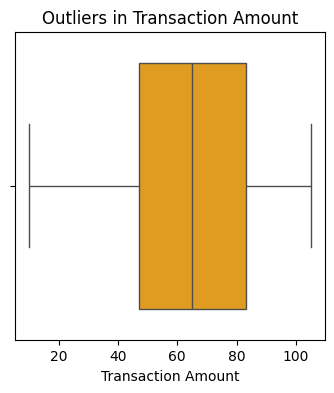

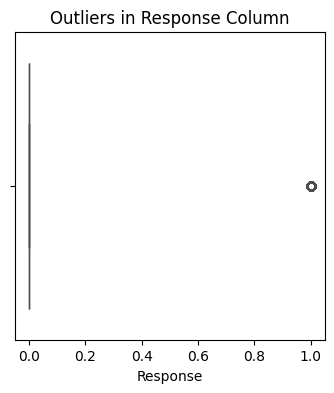

In [11]:
plt.figure(figsize=(4,4))
sns.boxplot(x=df['tran_amount'],color='orange')
plt.title("Outliers in Transaction Amount")
plt.xlabel("Transaction Amount")
plt.show()

print("\n\n")
plt.figure(figsize=(4,4))
sns.boxplot(x=df['response'],color='red')
plt.title("Outliers in Response Column")
plt.xlabel("Response")
plt.show()


In [12]:
df['months']=df['trans_date'].dt.month
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_9896\1941809520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['months']=df['trans_date'].dt.month


,customer_id,trans_date,tran_amount,response,months
0,CS5295,2013-02-11,35.0,1,2
1,CS4768,2015-03-15,39.0,1,3
2,CS2122,2013-02-26,52.0,0,2
3,CS1217,2011-11-16,99.0,0,11
4,CS1850,2013-11-20,78.0,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64.0,0,6
124996,CS7232,2014-08-19,38.0,0,8
124997,CS8731,2014-11-28,42.0,0,11
124998,CS8133,2013-12-14,13.0,0,12


In [13]:
#Which 3 months have the highest transaction amount?
monthly_sales = df.groupby('months')['tran_amount'].sum().sort_values(ascending=False).reset_index()
top3_months = monthly_sales.head(3)
print("Top 3 Months by Total Transaction Amount: \n{}".format(top3_months))

Top 3 Months by Total Transaction Amount: 
   months  tran_amount
0       8     726775.0
1      10     725058.0
2       1     724089.0


In [14]:
#Customers having highest number of orders?
customers = df['customer_id'].value_counts().reset_index()
customers.columns = ['customer_id', 'order_count']
top_customers = customers.head()
top_customers

,customer_id,order_count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS1215,35
4,CS5109,35


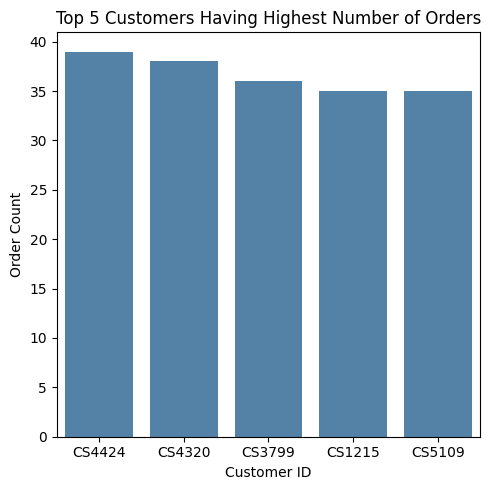

In [15]:
plt.figure(figsize=(5,5))
sns.barplot(x='customer_id', y='order_count', data=top_customers,color='steelblue')
plt.title("Top 5 Customers Having Highest Number of Orders")
plt.xlabel("Customer ID")
plt.ylabel("Order Count")
plt.tight_layout()
plt.show()


In [16]:
#Customers having highest value of orders?
customers = df.groupby('customer_id')['tran_amount'].sum().sort_values(ascending=False).reset_index()
top_customers = customers.head(5)
print("Customers having highest value of orders are: \n{}".format(top_customers))

Customers having highest value of orders are: 
  customer_id  tran_amount
0      CS4424       2933.0
1      CS4320       2647.0
2      CS5752       2612.0
3      CS4660       2527.0
4      CS3799       2513.0


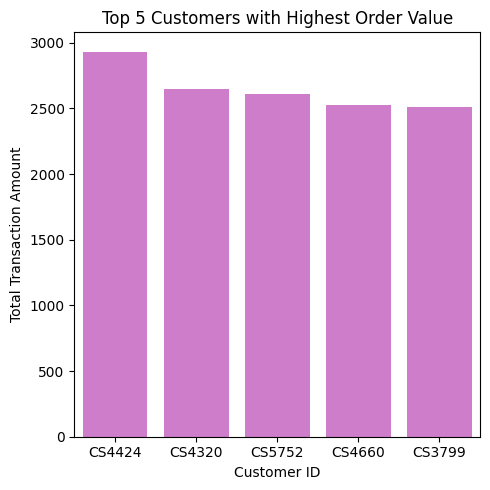

In [17]:
plt.figure(figsize=(5, 5))
sns.barplot(x='customer_id', y='tran_amount', data=top_customers,color='orchid')
plt.title("Top 5 Customers with Highest Order Value")
plt.xlabel("Customer ID")
plt.ylabel("Total Transaction Amount")
plt.tight_layout()
plt.show()

Advanced analysis


Time Series Analysis

In [18]:
import matplotlib.dates as mdates

C:\Users\DELL\AppData\Local\Temp\ipykernel_9896\3120432034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']=df['trans_date'].dt.to_period('M')


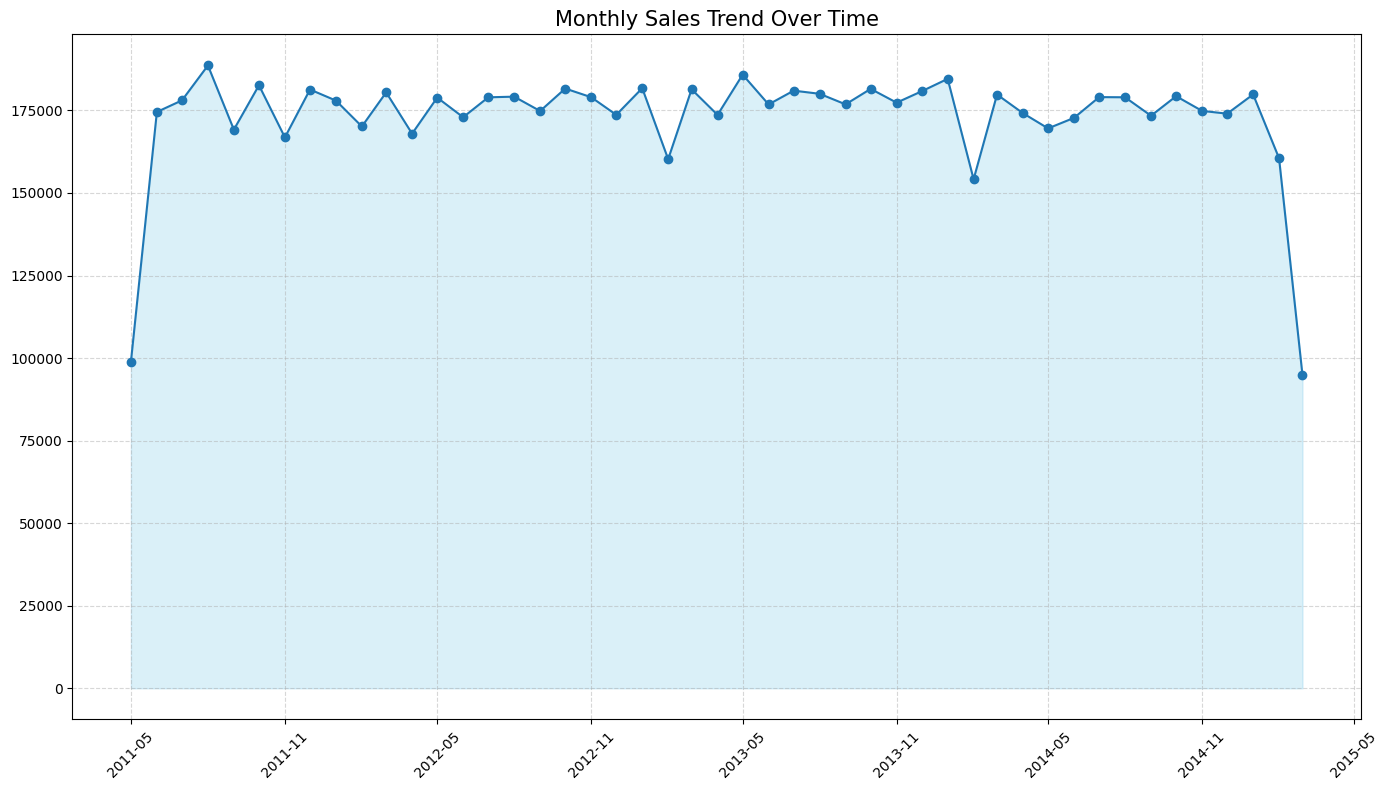

In [19]:
df['month_year']=df['trans_date'].dt.to_period('M')
monthly_sales=df.groupby('month_year')['tran_amount'].sum()
monthly_sales.index=monthly_sales.index.to_timestamp()
print("\n")
plt.figure(figsize=(14,8))
plt.plot(monthly_sales.index,monthly_sales.values, marker='o', linestyle='-')
plt.fill_between(monthly_sales.index, monthly_sales.values, color='skyblue', alpha=0.3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.title('Monthly Sales Trend Over Time', fontsize=15)
plt.xlable=('Month-Tear')
plt.ylable=('Monthly Sales')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Cohort Segmentation


In [20]:
#Recency
recency=df.groupby('customer_id')['trans_date'].max()

#Frequency
frequency=df.groupby('customer_id')['trans_date'].count()

#Monetary
monetary=df.groupby('customer_id')['tran_amount'].sum()

new=pd.DataFrame({'recency':recency,'frequency':frequency,'monetary':monetary})
new.reset_index(inplace=True)
new

,customer_id,recency,frequency,monetary
0,CS1112,2015-01-14,15,1012.0
1,CS1113,2015-02-09,20,1490.0
2,CS1114,2015-02-12,19,1432.0
3,CS1115,2015-03-05,22,1659.0
4,CS1116,2014-08-25,13,857.0
...,...,...,...,...
6879,CS8996,2014-12-09,13,582.0
6880,CS8997,2014-06-28,14,543.0
6881,CS8998,2014-12-22,13,624.0
6882,CS8999,2014-07-02,12,383.0


In [21]:
#Customer Segmentation
def segment_customer(row):
    if (row['recency'].year>=2012) and (row['frequency']>=15) and (row['monetary']>1000):
        return 'P0'
    elif (2011<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<=row['monetary']<=1000):
        return 'P1'
    else:
        return 'P2'
new['Segment']=new.apply(segment_customer,axis=1)
new

,customer_id,recency,frequency,monetary,Segment
0,CS1112,2015-01-14,15,1012.0,P0
1,CS1113,2015-02-09,20,1490.0,P0
2,CS1114,2015-02-12,19,1432.0,P0
3,CS1115,2015-03-05,22,1659.0,P0
4,CS1116,2014-08-25,13,857.0,P2
...,...,...,...,...,...
6879,CS8996,2014-12-09,13,582.0,P2
6880,CS8997,2014-06-28,14,543.0,P2
6881,CS8998,2014-12-22,13,624.0,P2
6882,CS8999,2014-07-02,12,383.0,P2


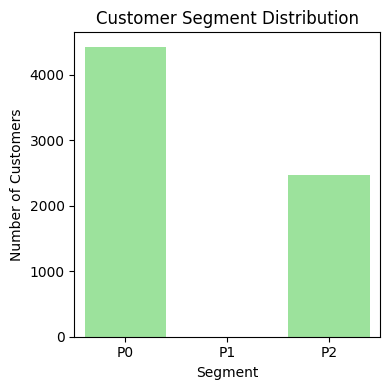

In [22]:
plt.figure(figsize=(4,4))
sns.countplot(x='Segment', data=new, order=['P0', 'P1', 'P2'], color='lightgreen')
plt.title("Customer Segment Distribution")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

CHURN ANALYSIS

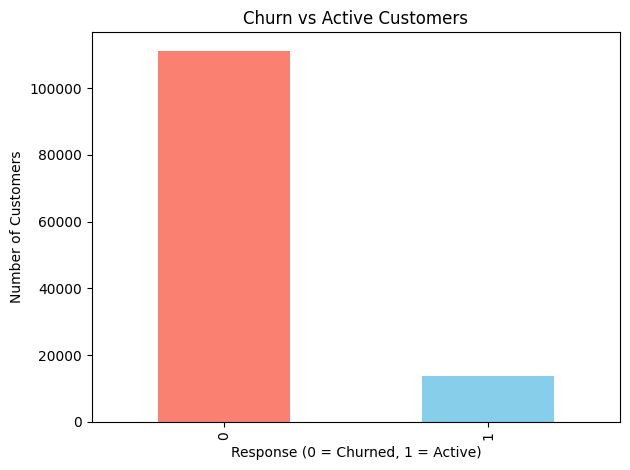

In [23]:
#Count the number of churned and active customers
import matplotlib.pyplot as plt

churn_counts = df['response'].value_counts()
churn_counts.plot(kind='bar', color=['salmon', 'skyblue'])

plt.title("Churn vs Active Customers")
plt.xlabel("Response (0 = Churned, 1 = Active)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9896\3253399344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date'] = pd.to_datetime(df['trans_date'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_9896\3253399344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['trans_date'].dt.to_period('M')


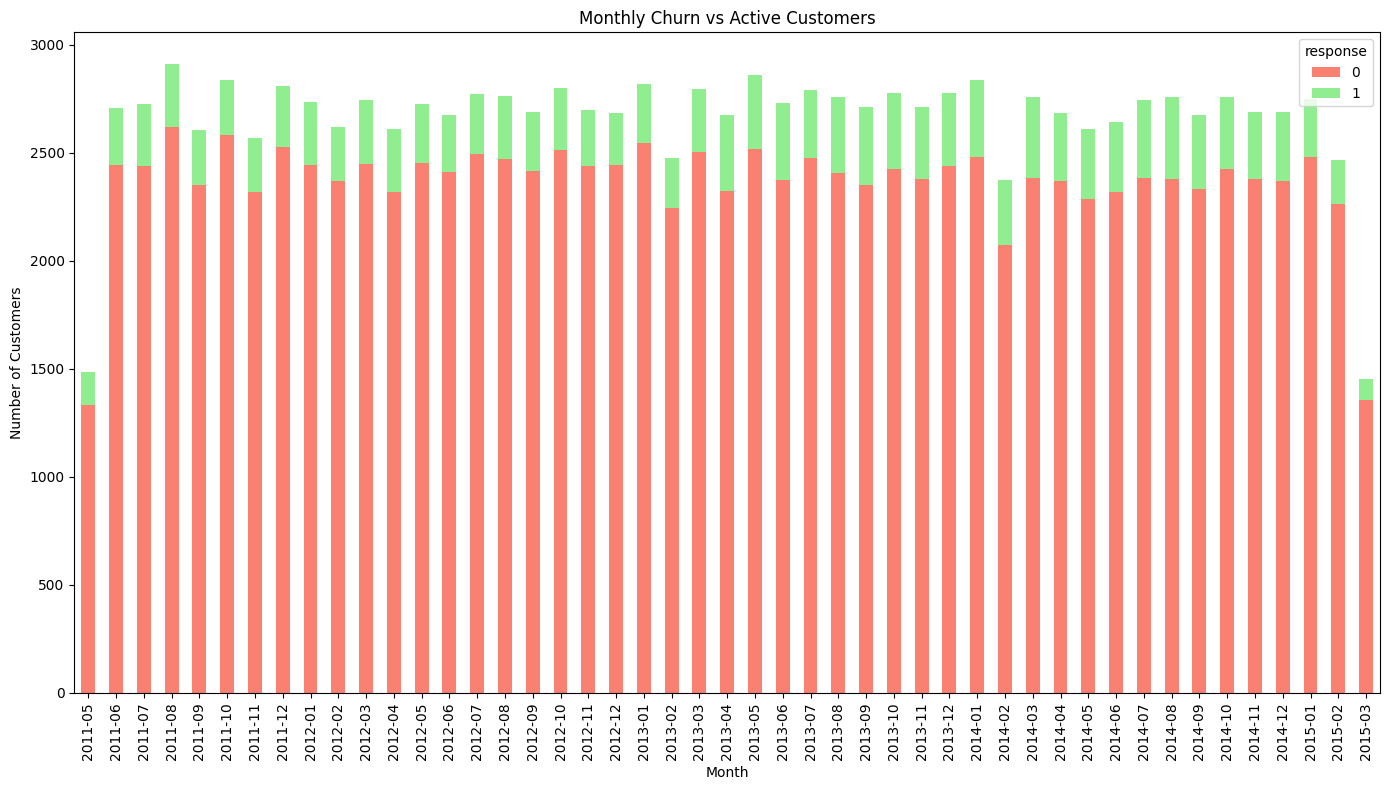

In [24]:
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['Month'] = df['trans_date'].dt.to_period('M')
monthly_churn = df.groupby(['Month', 'response']).size().unstack(fill_value=0)

monthly_churn.plot(kind='bar', stacked=True, figsize=(14,8), color=['salmon','lightgreen'])
plt.title("Monthly Churn vs Active Customers")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_9896\2235735469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date'] = pd.to_datetime(df['trans_date'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_9896\2235735469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['trans_date'].dt.to_period('M')


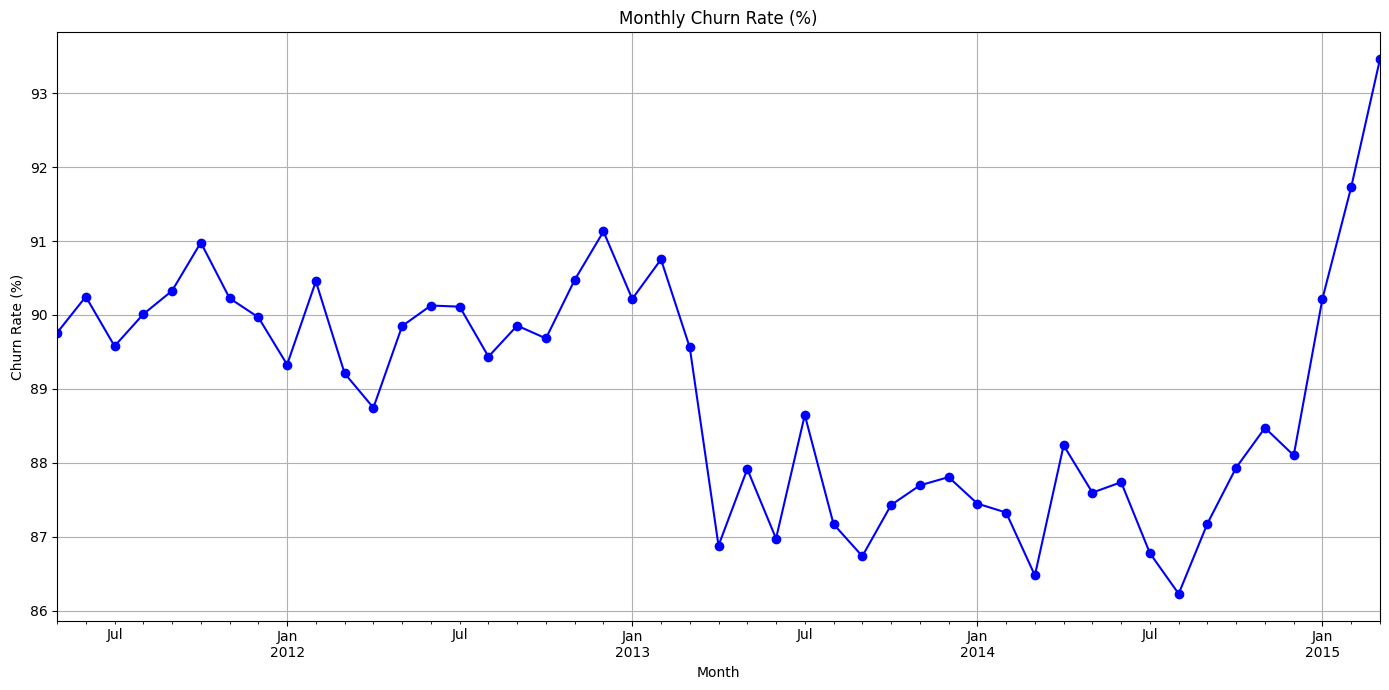

In [25]:
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['Month'] = df['trans_date'].dt.to_period('M')

monthly_counts = df.groupby(['Month', 'response']).size().unstack(fill_value=0)
monthly_counts['Churn Rate (%)'] = monthly_counts[0] / (monthly_counts[0] + monthly_counts[1]) * 100

monthly_counts['Churn Rate (%)'].plot(kind='line', marker='o', figsize=(14,7), color='blue')
plt.title("Monthly Churn Rate (%)")
plt.xlabel("Month")
plt.ylabel("Churn Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


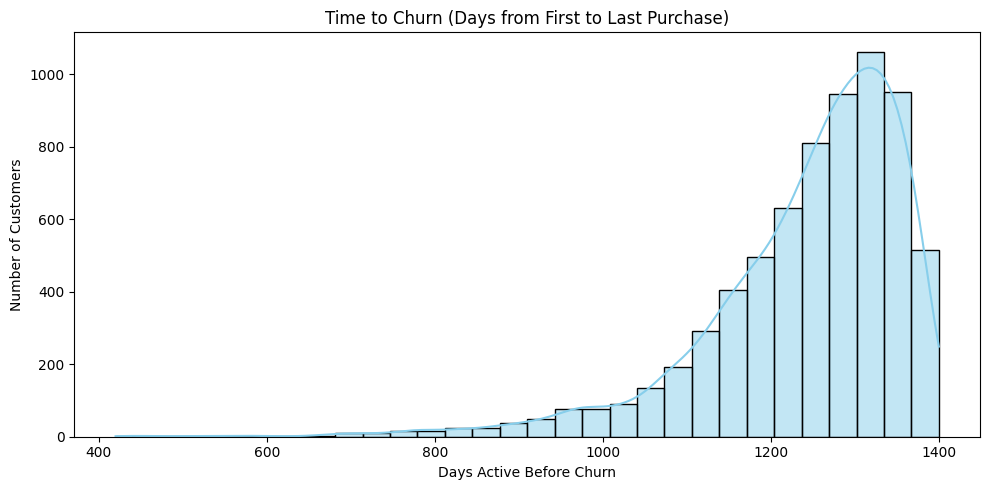

In [26]:
last_purchase = df.groupby('customer_id')['trans_date'].max()
first_purchase = df.groupby('customer_id')['trans_date'].min()
time_to_churn = (last_purchase - first_purchase).dt.days

plt.figure(figsize=(10, 5))
sns.histplot(time_to_churn, bins=30, kde=True, color='skyblue')
plt.title("Time to Churn (Days from First to Last Purchase)")
plt.xlabel("Days Active Before Churn")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_9896\2933444616.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date'] = pd.to_datetime(df['trans_date'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_9896\2933444616.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['trans_date'].dt.to_period('M')


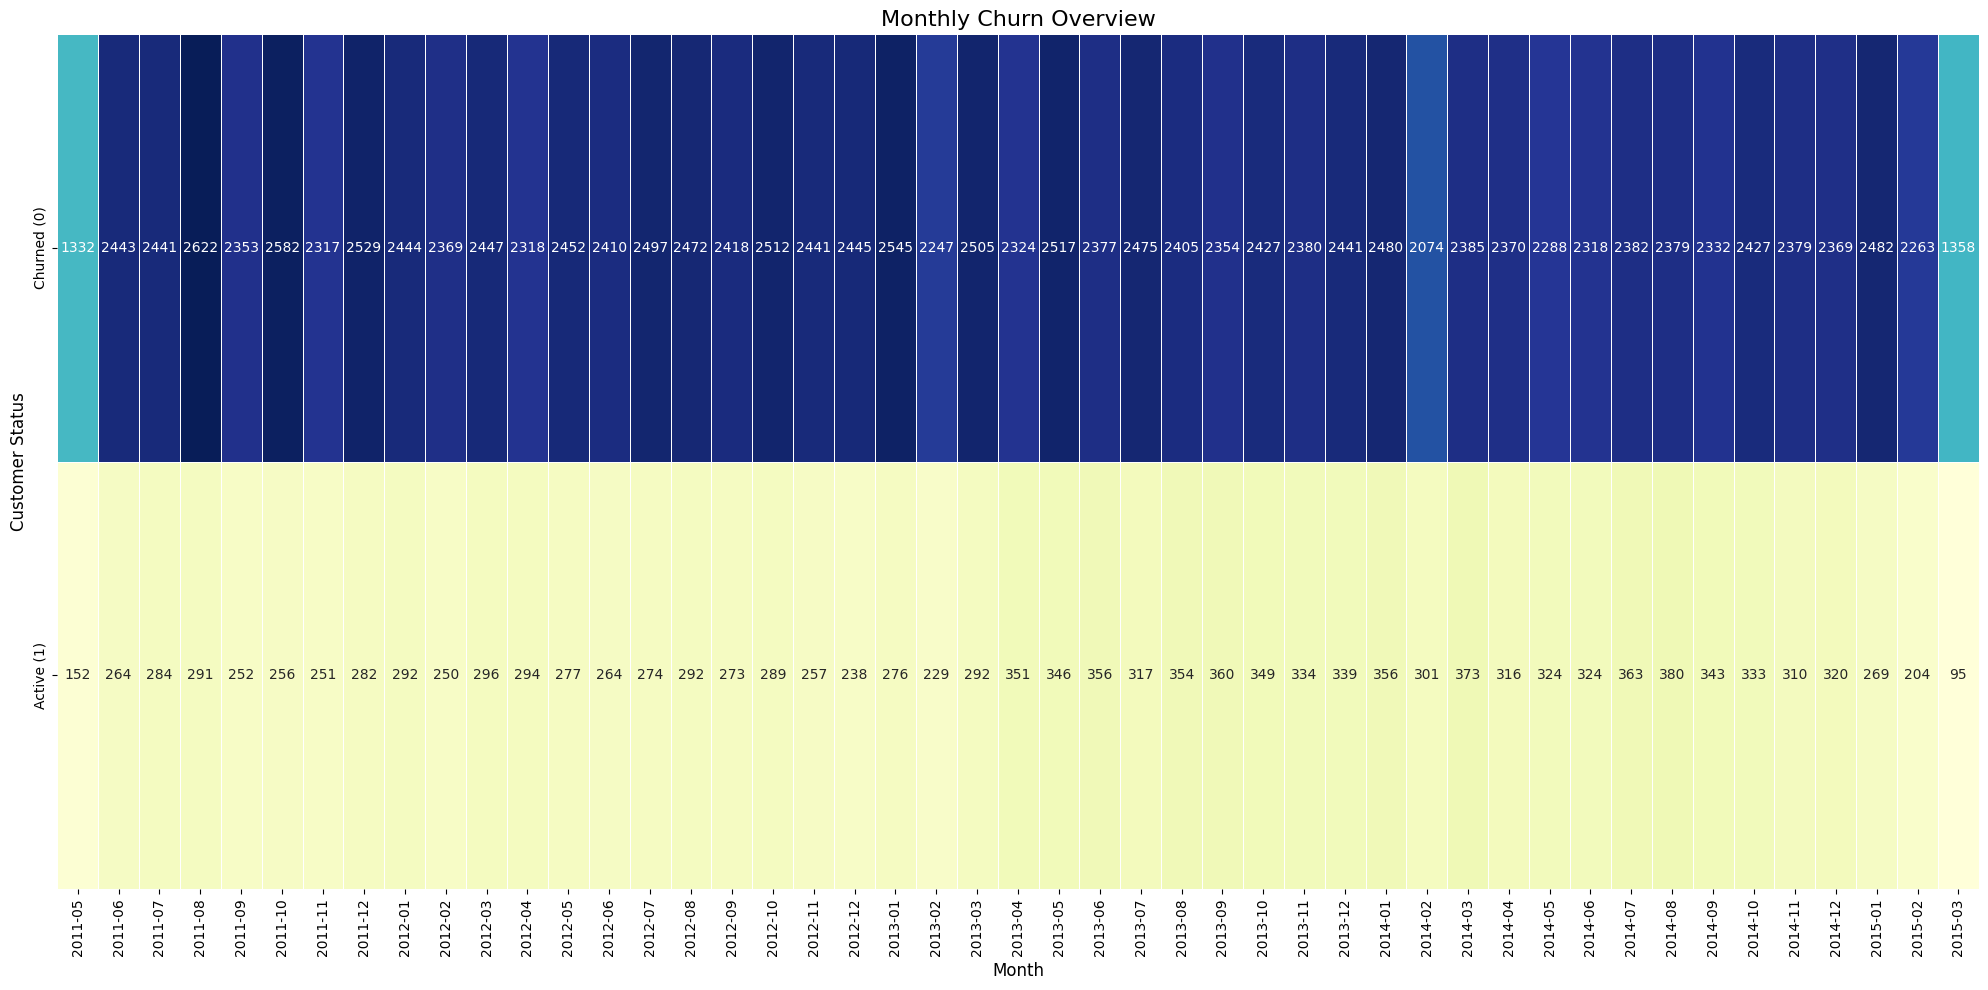

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

df['trans_date'] = pd.to_datetime(df['trans_date'])
df['Month'] = df['trans_date'].dt.to_period('M')

churn_table = df.groupby(['Month', 'response']).size().unstack(fill_value=0)
churn_table.columns = ['Churned (0)', 'Active (1)']
churn_table.index = churn_table.index.astype(str) 

plt.figure(figsize=(20,10))
sns.heatmap(churn_table.T, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.6, cbar=False)

plt.title("Monthly Churn Overview", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Customer Status", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


ANALYSING THE TOP CUSTOMERS

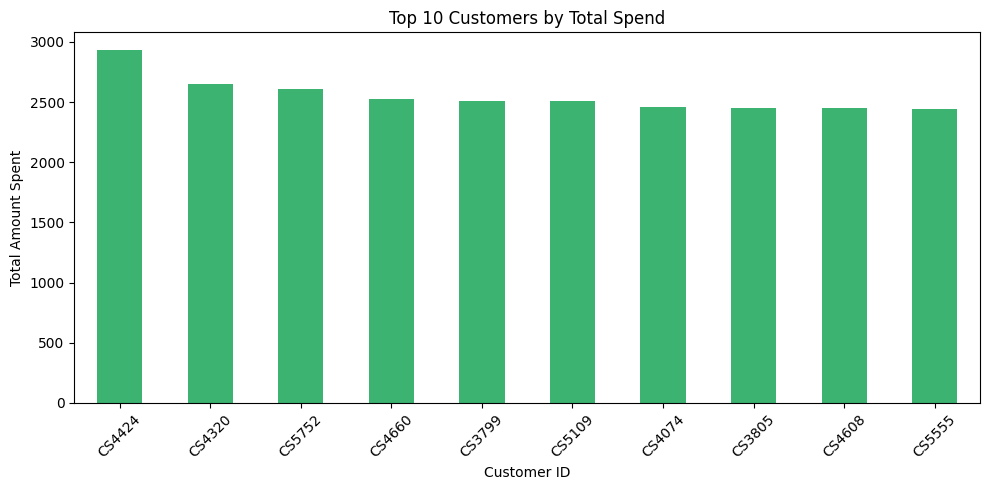

In [28]:
top_spenders = df.groupby('customer_id')['tran_amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_spenders.plot(kind='bar', color='mediumseagreen')
plt.title("Top 10 Customers by Total Spend")
plt.xlabel("Customer ID")
plt.ylabel("Total Amount Spent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


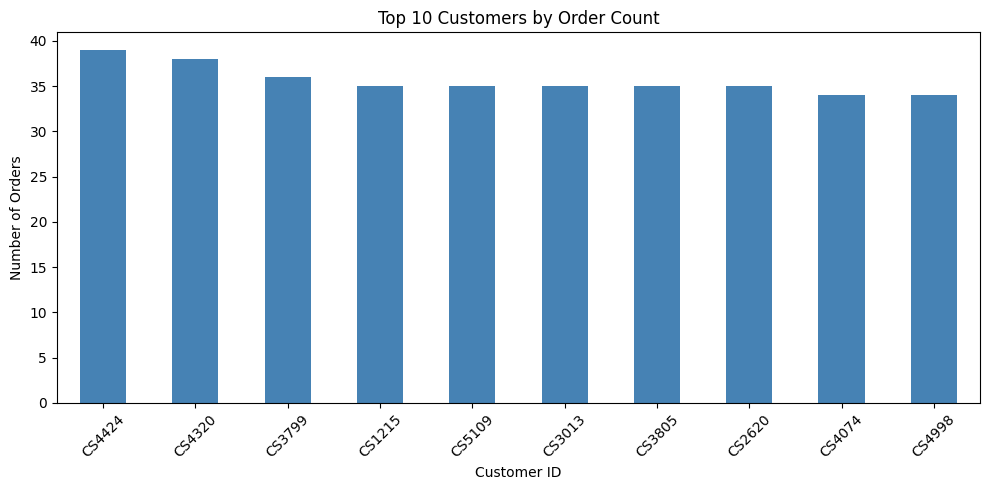

In [29]:
top_frequent = df['customer_id'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_frequent.plot(kind='bar', color='steelblue')
plt.title("Top 10 Customers by Order Count")
plt.xlabel("Customer ID")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


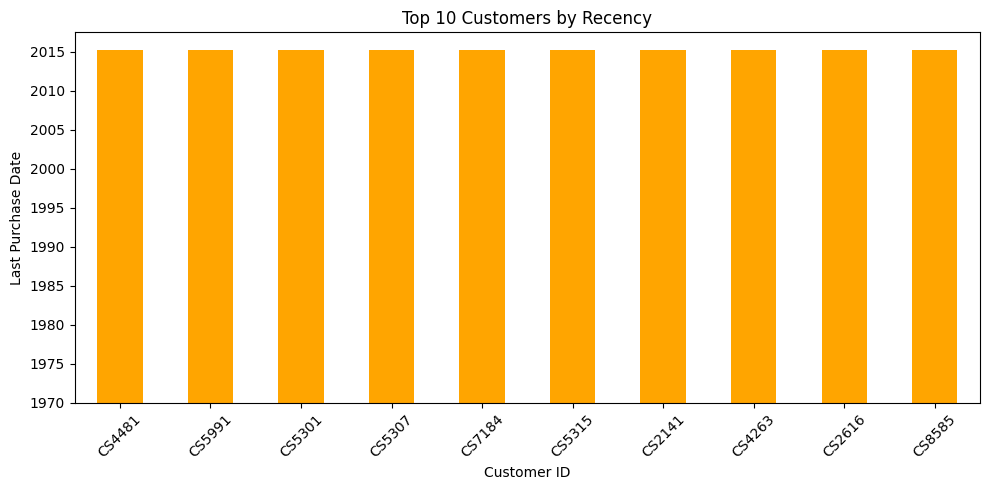

In [30]:
recent = df.groupby('customer_id')['trans_date'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
recent.index = recent.index.astype(str)
recent = recent.sort_values()  # So most recent is rightmost
recent.plot(kind='bar', color='orange')
plt.title("Top 10 Customers by Recency")
plt.xlabel("Customer ID")
plt.ylabel("Last Purchase Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [31]:
df.to_csv('MainData.csv',index=False)

In [32]:
new.to_csv('AdditionalAnalysis.csv',index=False)